# Load the data

In [18]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [3]:
data_path = "../data/Kaggle/churn-prediction/train.csv"

In [59]:
df = pd.read_csv(data_path)
df.shape

(130000, 8)

# basic statistics of data

In [5]:
df.dtypes

# Customer_ID    float64
Sessions         float64
Cell_ID          float64
District_ID      float64
Complaints_U     float64
Complaints_R     float64
Complaints_W     float64
Label            float64
dtype: object

In [6]:
df.head(10)

,# Customer_ID,Sessions,Cell_ID,District_ID,Complaints_U,Complaints_R,Complaints_W,Label
0,44236450.0,3.0,0.0,4096.0,0.0,0.0,0.0,1.0
1,2948643.0,10.0,0.0,4049.0,0.0,0.0,0.0,1.0
2,42637860.0,11.0,0.0,4044.0,0.0,0.0,0.0,0.0
3,40512349.0,8.0,0.0,4080.0,0.0,0.0,0.0,1.0
4,2149557.0,13.0,0.0,4096.0,0.0,0.0,0.0,0.0
5,44022190.0,4.0,123386.0,4145.0,0.0,0.0,0.0,0.0
6,43826714.0,6.0,0.0,4096.0,0.0,0.0,0.0,0.0
7,1603859.0,17.0,0.0,4026.0,0.0,0.0,0.0,1.0
8,1638690.0,15.0,0.0,4029.0,0.0,0.0,0.0,1.0
9,45208763.0,9.0,63554.0,4037.0,0.0,0.0,0.0,0.0


In [9]:
profile = pandas_profiling.ProfileReport(df)
profile

Number of variables,8
Number of observations,130000
Total Missing (%),0.0%
Total size in memory,7.9 MiB
Average record size in memory,64.0 B
Numeric,7
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


# Variables

In [73]:
df['District_ID'].nunique()

100

In [75]:
df['Cell_ID'].nunique()

7289

In [7]:
df.groupby('Complaints_U')['Complaints_U'].count()

Complaints_U
0.0    129363
1.0       625
2.0        12
Name: Complaints_U, dtype: int64

In [8]:
df.groupby('Complaints_R')['Complaints_R'].count()

Complaints_R
0.0    126011
1.0      3467
2.0       428
3.0        66
4.0        15
5.0        10
7.0         3
Name: Complaints_R, dtype: int64

In [9]:
df.groupby('Complaints_W')['Complaints_W'].count()

Complaints_W
0.0    129267
1.0       620
2.0        84
3.0        19
4.0         5
5.0         1
6.0         3
7.0         1
Name: Complaints_W, dtype: int64

In [21]:
df['Sessions'].describe()

count    130000.000000
mean         21.169662
std          40.478495
min           1.000000
25%           7.000000
50%          11.000000
75%          24.000000
max        3324.000000
Name: Sessions, dtype: float64

In [52]:
outlier_threshold = (df['Sessions'].quantile(0.75) - df['Sessions'].quantile(0.25))*1.5 + df['Sessions'].quantile(0.75)
outlier_threshold = df['Sessions'].quantile(0.99)
df.loc[:,'Sessions'][df.loc[:,'Sessions'] > outlier_threshold] = np.ceil(outlier_threshold)

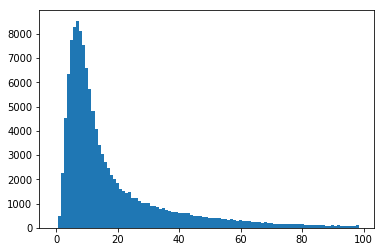

In [67]:
plt.hist(df['Sessions'], bins=np.arange(0,100), align='left');